In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,StratifiedKFold,train_test_split,StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import RobustScaler
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
HCM=pd.read_csv("HCM.csv")

In [3]:
HCM.head()

,Chuyen muc,Quan/huyen,Xa/Phuong,Duong/khu vuc,Gia,Dien tich,Huong,So Tang,So phong,Nha ve sinh,Giay to phap,Thang,Nam
0,Nhà,Quận Phú Nhuận,Phường 14,Đường Huỳnh Văn Bánh,6.900,33.0,NaN,NaN,4.0,3.0,Đã có sổ,5,2021
1,Nhà,Huyện Hóc Môn,Xã Xuân Thới Sơn,Đường Kênh An Hạ,0.595,104.0,NaN,NaN,8.0,NaN,Đã có sổ,5,2021
2,Nhà,Quận Gò Vấp,Phường 10,Đường Quang Trung,4.750,56.0,Đông Nam,3.0,3.0,3.0,Đã có sổ,5,2021
3,Nhà,Quận 5,Phường 1,Đường Trần Bình Trọng,6.000,30.0,NaN,NaN,2.0,1.0,Đã có sổ,5,2021
4,Nhà,Huyện Củ Chi,Xã Phú Hòa Đông,Đường Cây Bài,1.900,125.0,NaN,NaN,2.0,1.0,Đã có sổ,5,2021


In [4]:
# for col in HCM:
# #     print(HCM[col].unique())
#     print(len(HCM[col].unique()))

In [5]:
HCM = HCM.dropna(axis=0, subset=['Quan/huyen', 'Xa/Phuong'])
HCM['Huong'] = HCM['Huong'].fillna("None")
HCM['Giay to phap'] = HCM['Giay to phap'].fillna("None")
HCM['So Tang'].fillna((HCM['So Tang'].mean()), inplace=True)
HCM['So phong'].fillna((HCM['So phong'].mean()), inplace=True)
HCM['Nha ve sinh'].fillna((HCM['Nha ve sinh'].mean()), inplace=True)
dictt = []

HCM["Chuyen muc"] = HCM["Chuyen muc"].astype('category')
dictt.append(dict(enumerate(HCM["Chuyen muc"].cat.categories)))
HCM["Chuyen muc"] = HCM["Chuyen muc"].cat.codes

HCM["Quan/huyen"] = HCM["Quan/huyen"].astype('category')
dictt.append(dict(enumerate(HCM["Quan/huyen"].cat.categories)))
HCM["Quan/huyen"] = HCM["Quan/huyen"].cat.codes

HCM["Xa/Phuong"] = HCM["Xa/Phuong"].astype('category')
dictt.append(dict(enumerate(HCM["Xa/Phuong"].cat.categories)))
HCM["Xa/Phuong"] = HCM["Xa/Phuong"].cat.codes

HCM["Duong/khu vuc"] = HCM["Duong/khu vuc"].astype('category')
dictt.append(dict(enumerate(HCM["Duong/khu vuc"].cat.categories)))
HCM["Duong/khu vuc"] = HCM["Duong/khu vuc"].cat.codes

HCM["Huong"] = HCM["Huong"].astype('category')
dictt.append(dict(enumerate(HCM["Huong"].cat.categories)))
HCM["Huong"] = HCM["Huong"].cat.codes

HCM["Giay to phap"] = HCM["Giay to phap"].astype('category')
dictt.append(dict(enumerate(HCM["Giay to phap"].cat.categories)))
HCM["Giay to phap"] = HCM["Giay to phap"].cat.codes

HCM["Thang"] = HCM["Thang"].astype('category')
dictt.append(dict(enumerate(HCM["Thang"].cat.categories)))
HCM["Thang"] = HCM["Thang"].cat.codes

HCM["Nam"] = HCM["Nam"].astype('category')
dictt.append(dict(enumerate(HCM["Nam"].cat.categories)))
HCM["Nam"] = HCM["Nam"].cat.codes


In [6]:
# HCM.dtypes

In [7]:
# for col in HCM:
#     print(HCM[col].isna().sum())

In [8]:
HCM

,Chuyen muc,Quan/huyen,Xa/Phuong,Duong/khu vuc,Gia,Dien tich,Huong,So Tang,So phong,Nha ve sinh,Giay to phap,Thang,Nam
0,1,21,5,1999,6.900,33.0,2,2.466713,4.0,3.000000,5,4,2
1,1,3,170,2465,0.595,104.0,2,2.466713,8.0,2.535517,5,4,2
2,1,20,1,4187,4.750,56.0,8,3.000000,3.0,3.000000,5,4,2
3,1,12,0,5397,6.000,30.0,2,2.466713,2.0,1.000000,5,4,2
4,1,2,139,1342,1.900,125.0,2,2.466713,2.0,1.000000,5,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88248,1,5,107,5440,11.500,23.0,2,2.466713,3.0,3.000000,6,10,0
88249,1,19,36,4385,6.300,65.0,5,2.466713,6.0,6.000000,6,10,0
88250,1,19,42,2804,5.600,60.0,2,2.466713,4.0,2.535517,2,10,0
88251,1,0,130,2079,0.650,70.0,2,2.000000,2.0,2.000000,6,10,0


In [9]:
avg_price_dict = {0: 18.6,
  1: 13.5,
  2: 9.4,
  3: 21.8,
  4: 53,
  5: 396,
  6: 208,
  7: 152,
  8: 52,
  9: 100,
  10: 261,
  11: 71.1,
  12: 247,
  13: 101,
  14: 90.1,
  15: 85.3,
  16: 55.4,
  17: 55.4,
  18: 125,
  19: 72.4,
  20: 97.3,
  21: 185,
  22: 68.9,
  23: 140,
  24: 97.3}

In [10]:
urban_pop= {0: 22573,
            1: 11154,
            2: 23176,
            3: 18145,
            4: 45524,
            5: 142625,
            6: 234819,
            7: 209867,
            8: 620146,
            9: 180275,
            10: 190375,
            11: 175329,
            12: 159073,
            13: 233561,
            14: 360155,
            15: 424667,
            16: 397006,
            17: 397006,
            18: 499164,
            19: 784173,
            20: 676899,
            21: 163961,
            22: 592686,
            23: 474792,
            24: 485348
            }

In [11]:
rural_pop = { 0: 682935,
              1: 60372,
              2: 438871,
              3: 524098,
              4: 161313,
              5: 0,
              6: 0,
              7: 0,
              8: 0,
              9: 0,
              10: 0,
              11: 0,
              12: 0,
              13: 0,
              14: 0,
              15: 0,
              16: 0,
              17: 0,
              18: 0,
              19: 0,
              20: 0,
              21: 0,
              22: 0,
              23: 0,
              24: 0
            }

In [12]:
density_pop = { 0: 2793,
              1: 102,
              2: 1063,
              3: 4967,
              4: 2060,
              5: 18475,
              6: 36690,
              7: 40830,
              8: 11759,
              9: 3441,
              10: 38694,
              11: 41945,
              12: 37254,
              13: 32712,
              14: 10091,
              15: 22222,
              16: 2721,
              17: 2721,
              18: 24021,
              19: 15074,
              20: 34308,
              21: 33737,
              22: 11138,
              23: 21168,
              24: 30391
            }

In [13]:
dictt

[{0: 'Căn hộ, Chung cư', 1: 'Nhà'},
 {0: 'Huyện Bình Chánh',
  1: 'Huyện Cần Giờ',
  2: 'Huyện Củ Chi',
  3: 'Huyện Hóc Môn',
  4: 'Huyện Nhà Bè',
  5: 'Quận 1',
  6: 'Quận 10',
  7: 'Quận 11',
  8: 'Quận 12',
  9: 'Quận 2',
  10: 'Quận 3',
  11: 'Quận 4',
  12: 'Quận 5',
  13: 'Quận 6',
  14: 'Quận 7',
  15: 'Quận 8',
  16: 'Quận 9',
  17: 'Quận 9 - Thành phố Thủ Đức',
  18: 'Quận Bình Thạnh',
  19: 'Quận Bình Tân',
  20: 'Quận Gò Vấp',
  21: 'Quận Phú Nhuận',
  22: 'Quận Thủ Đức',
  23: 'Quận Tân Bình',
  24: 'Quận Tân Phú'},
 {0: 'Phường 1',
  1: 'Phường 10',
  2: 'Phường 11',
  3: 'Phường 12',
  4: 'Phường 13',
  5: 'Phường 14',
  6: 'Phường 15',
  7: 'Phường 16',
  8: 'Phường 17',
  9: 'Phường 18',
  10: 'Phường 19',
  11: 'Phường 2',
  12: 'Phường 21',
  13: 'Phường 22',
  14: 'Phường 24',
  15: 'Phường 25',
  16: 'Phường 26',
  17: 'Phường 27',
  18: 'Phường 28',
  19: 'Phường 3',
  20: 'Phường 4',
  21: 'Phường 5',
  22: 'Phường 6',
  23: 'Phường 7',
  24: 'Phường 8',
  25: 'Ph

In [13]:
for i, row in HCM.iterrows():
    if row['Gia'] / row['Dien tich'] < 0.001 or row['Gia']/row['Dien tich'] > 1000:
        HCM.drop(i, inplace=True)
    else:
        row['Gia/m2'] = row['Gia'] / row['Dien tich']
        HCM.at[i,'Gia/m2'] = row['Gia/m2']

In [14]:
HCM['Gia Trung Binh'] = HCM['Quan/huyen'].map(avg_price_dict)
HCM['Mat Do Dan So'] = HCM['Quan/huyen'].map(density_pop)
HCM['Dan So Nong Thon'] = HCM['Quan/huyen'].map(rural_pop)
HCM['Dan So Thanh Thi'] = HCM['Quan/huyen'].map(urban_pop)

In [15]:
HCM

,Chuyen muc,Quan/huyen,Xa/Phuong,Duong/khu vuc,Gia,Dien tich,Huong,So Tang,So phong,Nha ve sinh,Giay to phap,Thang,Nam,Gia/m2,Gia Trung Binh,Mat Do Dan So,Dan So Nong Thon,Dan So Thanh Thi
0,1,21,5,1999,6.900,33.0,2,2.466713,4.0,3.000000,5,4,2,0.209091,185.0,33737,0,163961
1,1,3,170,2465,0.595,104.0,2,2.466713,8.0,2.535517,5,4,2,0.005721,21.8,4967,524098,18145
2,1,20,1,4187,4.750,56.0,8,3.000000,3.0,3.000000,5,4,2,0.084821,97.3,34308,0,676899
3,1,12,0,5397,6.000,30.0,2,2.466713,2.0,1.000000,5,4,2,0.200000,247.0,37254,0,159073
4,1,2,139,1342,1.900,125.0,2,2.466713,2.0,1.000000,5,4,2,0.015200,9.4,1063,438871,23176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88248,1,5,107,5440,11.500,23.0,2,2.466713,3.0,3.000000,6,10,0,0.500000,396.0,18475,0,142625
88249,1,19,36,4385,6.300,65.0,5,2.466713,6.0,6.000000,6,10,0,0.096923,72.4,15074,0,784173
88250,1,19,42,2804,5.600,60.0,2,2.466713,4.0,2.535517,2,10,0,0.093333,72.4,15074,0,784173
88251,1,0,130,2079,0.650,70.0,2,2.000000,2.0,2.000000,6,10,0,0.009286,18.6,2793,682935,22573


In [16]:
import scipy.stats as stats
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [17]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [18]:
ap_upper_limit, ap_lower_limit = find_skewed_boundaries(HCM, 'Gia/m2', 1.5)
ap_upper_limit, ap_lower_limit

(0.2046511627906977, -0.07441860465116282)

In [19]:
# Now let's replace the outliers by the maximum and minimum limit

HCM['Gia/m2']= np.where(HCM['Gia/m2'] > ap_upper_limit, ap_upper_limit,
                       np.where(HCM['Gia/m2'] < ap_lower_limit, ap_lower_limit, HCM['Gia/m2']))

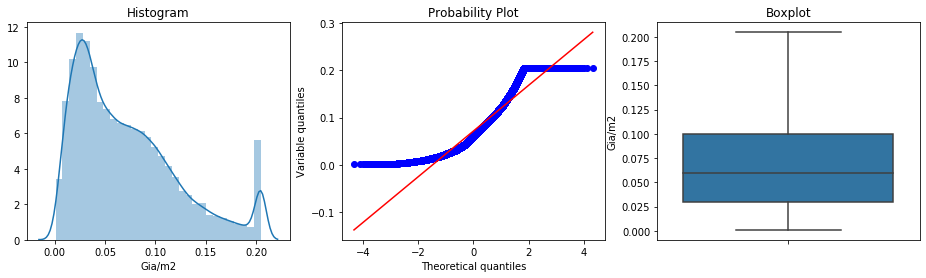

In [20]:
diagnostic_plots(HCM, 'Gia/m2')

In [21]:
# ap_upper_limit, ap_lower_limit = find_skewed_boundaries(HCM, 'Dien tich', 1.5)
# ap_upper_limit, ap_lower_limit
# HCM['Dien tich'] = np.where(HCM['Dien tich'] > ap_upper_limit, ap_upper_limit,
#                        np.where(HCM['Dien tich'] < ap_lower_limit, ap_lower_limit, HCM['Dien tich']))
# diagnostic_plots(HCM, 'Dien tich')

In [22]:
from sklearn.model_selection import train_test_split

ratio = 0.9
# HCM.drop(HCM.columns[-5], axis =  1, inplace = True)

train_df, test_df = train_test_split(HCM, test_size=(1-ratio))
# train_df=HCM[:int(HCM.shape[0]*ratio)]
# test_df=HCM[int(HCM.shape[0]*ratio):]
X=train_df.drop(['Gia'],axis=1)
y=train_df['Gia'] 
X_main_test=test_df.drop(['Gia'],axis=1)

In [23]:
test_size = len(test_df)/(len(test_df)+len(train_df))
test_size = int(test_size*100)/100

In [24]:
from lightgbm import LGBMClassifier
import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
import statistics

In [25]:
def modelfit(alg, dtrain, target, only_predict = False):
    #Fit the algorithm on the data
    time_start = time.perf_counter() #start counting the time
    if not only_predict:
        alg.fit(dtrain, target)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    
    kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
    
    cv_score = cross_val_score(alg, dtrain,target, cv=kfolds, scoring='neg_mean_absolute_error')
    cv_score = np.sqrt(-cv_score)
    
    cv_score_med = cross_val_score(alg, dtrain,target, cv=kfolds, scoring='neg_median_absolute_error')
    cv_score_med = np.sqrt(-cv_score_med)
    
    time_end = time.perf_counter()
    
    total_time = time_end-time_start
    #Print model report:
    print("\nModel Report")
    print("RMSE :  {:.4f}".format(np.sqrt(mean_squared_error(target, dtrain_predictions))))
    print("MSE :  {:.4f}".format(mean_squared_error(target, dtrain_predictions)))
    print("MAE :  {:.4f}".format(mean_absolute_error(target, dtrain_predictions)))
    print("MAE_median :  {:.4f}".format(median_absolute_error(target, dtrain_predictions)))
    print("RMAE :  {:.4f}".format(np.sqrt(mean_absolute_error(target, dtrain_predictions))))
    print("RMAE_median :  {:.4f}".format(np.sqrt(median_absolute_error(target, dtrain_predictions))))
    print("R2 :  {:.4f}".format(r2_score(target, dtrain_predictions)))
    print("CV Score : Mean -  %.4f | Std -  %.4f | Min -  %.4f | Max - %.4f" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    print("Amount of time training the model and CV: %4.3f seconds" % (total_time))

In [26]:
from sklearn.model_selection import GridSearchCV
#XGBoost hyper-parameter tuning
def LGBMhyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.05, 0.1],
        'num_leaves': [5, 10, 20, 31, 40],
        'min_child_samples': [200, 300, 500], 
        'min_child_weight': [1e-1, 1, 1e1],
        'n_estimators' : [100, 200, 500, 1000]
    }

    lgbm_model = lgb.LGBMRegressor()

    gsearch = GridSearchCV(estimator = lgbm_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [27]:
# Plot feature importance
def plot_feature_importance(model, df):
    feature_importance = model.feature_importances_[:30]
    # make importances relative to max importance
    plt.figure(figsize=(20, 20)) #figure size
    feature_importance = 100.0 * (feature_importance / feature_importance.max()) #making it a percentage relative to the max value
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, df.columns[sorted_idx], fontsize=15) #used train_drop here to show the name of each feature instead of our train_prepared 
    plt.xlabel('Relative Importance', fontsize=20)
    plt.ylabel('Features', fontsize=20)
    plt.title('Variable Importance', fontsize=30)

In [28]:
# X

In [28]:
import lightgbm as lgb
# {'learning_rate': 0.01,
#  'min_child_samples': 200,
#  'min_child_weight': 0.1,
#  'n_estimators': 500,
#  'num_leaves': 40}
lgb_model = lgb.LGBMRegressor(num_leaves= 200, learning_rate= 0.01, min_child_weight= 0.01,min_child_samples=100, n_estimators= 500)
modelfit(lgb_model, X, y)


Model Report
RMSE :  11.3702
MSE :  129.2803
MAE :  0.6649
MAE_median :  0.0244
RMAE :  0.8154
RMAE_median :  0.1564
R2 :  0.4109
CV Score : Mean -  0.8505 | Std -  0.0802 | Min -  0.7170 | Max - 0.9561
Amount of time training the model and CV: 68.724 seconds


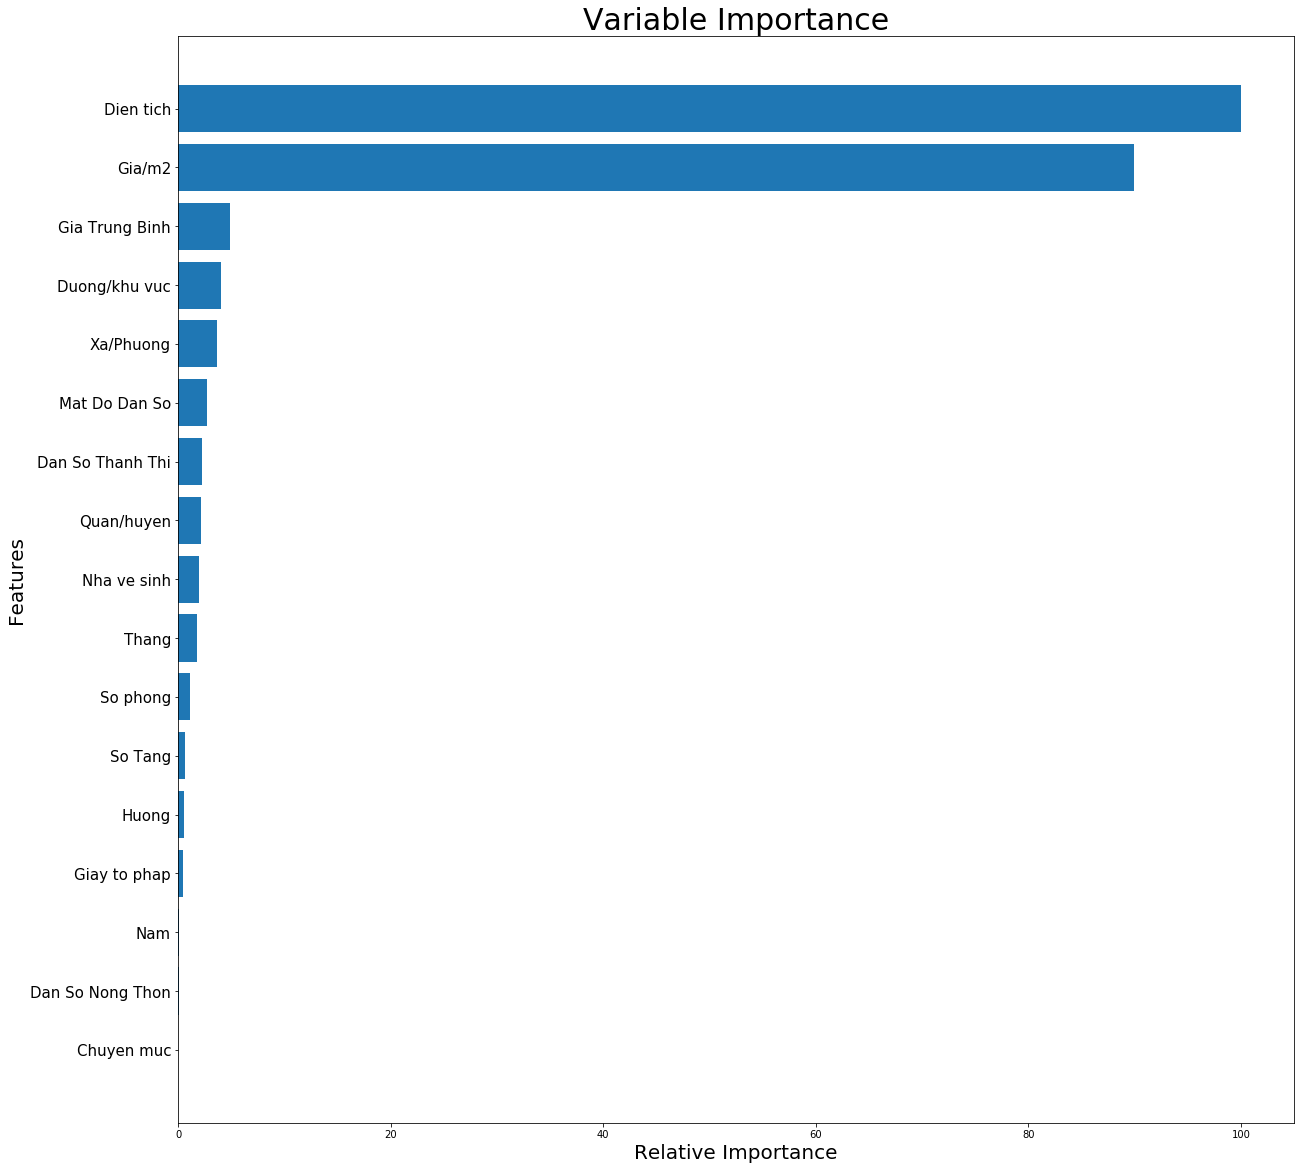

In [30]:
plot_feature_importance(lgb_model, X)

In [29]:
from xgboost import XGBRegressor

# {'colsample_bytree': 0.5,
#  'learning_rate': 0.01,
#  'max_depth': 10,
#  'n_estimators': 200}
        
my_XGB_model = XGBRegressor(colsample_bytree= 1, learning_rate= 0.01, max_depth= 10, n_estimators= 500)
# my_XGB_model.fit(X, y, verbose=False)
modelfit(my_XGB_model, X, y)


Model Report
RMSE :  2.4275
MSE :  5.8925
MAE :  0.1901
MAE_median :  0.0210
RMAE :  0.4361
RMAE_median :  0.1449
R2 :  0.9731
CV Score : Mean -  0.7868 | Std -  0.1135 | Min -  0.6317 | Max - 0.9242
Amount of time training the model and CV: 314.280 seconds


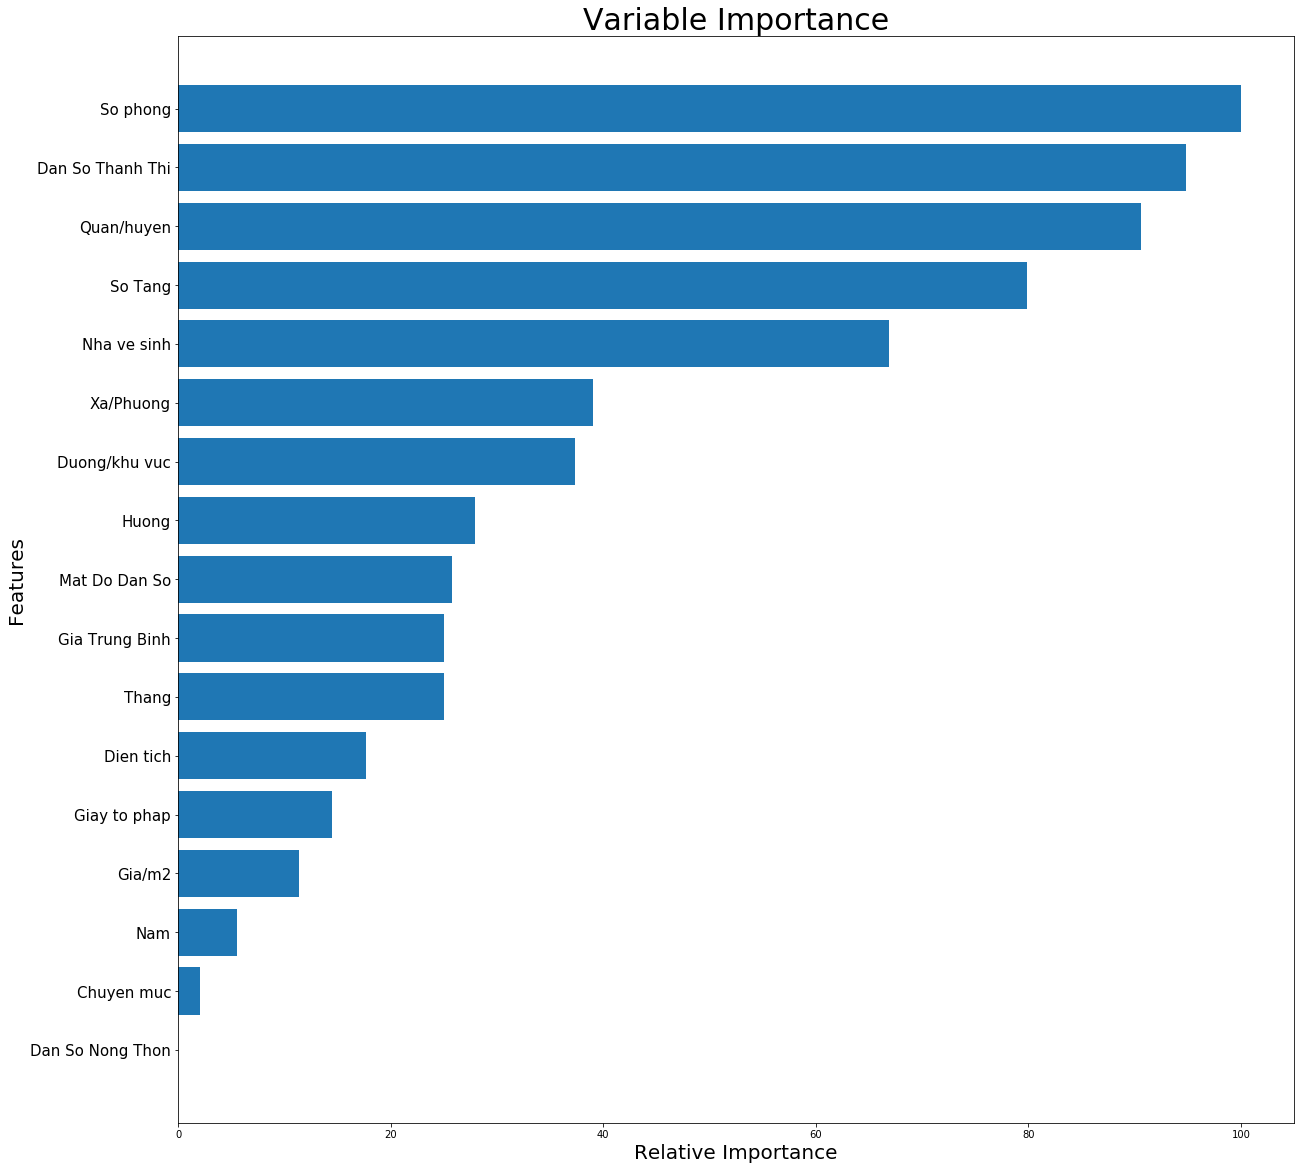

In [32]:
plot_feature_importance(my_XGB_model, X)

In [30]:
import statsmodels.api as sm
X_copy = X.copy()
X_copy.drop(X_copy.columns[-5], axis =  1, inplace = True)
ols = sm.OLS(y, X_copy)
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    Gia   R-squared (uncentered):                   0.158
Model:                            OLS   Adj. R-squared (uncentered):              0.158
Method:                 Least Squares   F-statistic:                              920.7
Date:                Fri, 18 Jun 2021   Prob (F-statistic):                        0.00
Time:                        17:36:41   Log-Likelihood:                     -3.2056e+05
No. Observations:               78480   AIC:                                  6.411e+05
Df Residuals:                   78464   BIC:                                  6.413e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Chuyen muc           1.2163      0.158      7.676      0.000       0.906       1.527
Quan/huyen           0.0438      0.011      3.952      0.000       0.022       0.065
Xa/Phuong           -0.0055      0.002     -3.161      0.002      -0.009      -0.002
Duong/khu vuc     3.568e-05   2.82e-05      1.265      0.206   -1.96e-05     9.1e-05
Dien tich            0.0100      0.000     38.240      0.000       0.010       0.011
Huong               -0.0017      0.025     -0.068      0.946      -0.051       0.047
So Tang              0.2185      0.067      3.262      0.001       0.087       0.350
So phong             1.1231      0.049     22.742      0.000       1.026       1.220
Nha ve sinh          0.2889      0.058      4.968      0.000       0.175       0.403
Giay to phap        -0.1846      0.036     -5.155      0.000      -0.255      -0.114
Thang               -0.1197      0.017     -6.989      0.000      -0.153      -0.086
Nam                 -0.3271      0.105     -3.109      0.002      -0.533      -0.121
Gia Trung Binh       0.0220      0.001     19.199      0.000       0.020       0.024
Mat Do Dan So    -3.686e-05   6.49e-06     -5.677      0.000   -4.96e-05   -2.41e-05
Dan So Nong Thon -2.665e-06   4.81e-07     -5.540      0.000   -3.61e-06   -1.72e-06
Dan So Thanh Thi -2.285e-06   3.47e-07     -6.582      0.000   -2.97e-06    -1.6e-06
==============================================================================
Omnibus:                   235994.278   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      20970571410.711
Skew:                          44.355   Prob(JB):                         0.00
Kurtosis:                    2533.840   Cond. No.                     1.48e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
xg_boost_ratio = 0.6
final_predictions_xg = my_XGB_model.predict(X_main_test)
final_predictions_lg = lgb_model.predict(X_main_test)
dif = final_predictions_lg*(1-xg_boost_ratio) + final_predictions_xg*xg_boost_ratio - test_df['Gia']
print(statistics.median(np.abs(dif)))

0.01702861383111276


In [33]:
from sklearn.model_selection import GridSearchCV
#XGBoost hyper-parameter tuning
def XGhyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [2, 3, 4, 6, 8, 10],
        'colsample_bytree': [0.3, 0.5, 0.7, 1],
        'n_estimators' : [50, 100, 200, 500]
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [ ]:
# Run only in the first run of the kernel.
# XGhyperParameterTuning(X, y)

In [ ]:
# LGBMhyperParameterTuning(X, y)

In [39]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
modelfit(regr, X, y)


Model Report
RMSE :  13.9204
MSE :  193.7768
MAE :  2.4989
MAE_median :  1.2523
RMAE :  1.5808
RMAE_median :  1.1191
R2 :  0.1274
CV Score : Mean -  1.5818 | Std -  0.0393 | Min -  1.5244 | Max - 1.6378
Amount of time training the model and CV: 0.662 seconds


In [34]:
# {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12},
# {0: 2019, 1: 2020, 2: 2021}]
# {0: 'Huyện Bình Chánh',
#   1: 'Huyện Cần Giờ',
#   2: 'Huyện Củ Chi',
#   3: 'Huyện Hóc Môn',
#   4: 'Huyện Nhà Bè',
#   5: 'Quận 1',
#   6: 'Quận 10',
#   7: 'Quận 11',
#   8: 'Quận 12',
#   9: 'Quận 2',
#   10: 'Quận 3',
#   11: 'Quận 4',
#   12: 'Quận 5',
#   13: 'Quận 6',
#   14: 'Quận 7',
#   15: 'Quận 8',
#   16: 'Quận 9',
#   17: 'Quận 9 - Thành phố Thủ Đức',
#   18: 'Quận Bình Thạnh',
#   19: 'Quận Bình Tân',
#   20: 'Quận Gò Vấp',
#   21: 'Quận Phú Nhuận',
#   22: 'Quận Thủ Đức',
#   23: 'Quận Tân Bình',
#   24: 'Quận Tân Phú'}
xg_boost_ratio = 0.9
HCM_copy = HCM.copy()
HCM_copy.drop(HCM_copy.columns[4], axis =  1, inplace = True)
# HCM_copy = HCM_copy.loc[HCM_copy['Quan/huyen'] == 0]
final_predictions_xg = my_XGB_model.predict(HCM_copy)
final_predictions_lg = lgb_model.predict(HCM_copy)
# final_predictions_li = ols_result.predict(HCM_copy)
ensemble = final_predictions_lg*(1-xg_boost_ratio) + final_predictions_xg*xg_boost_ratio
# print(statistics.median(np.abs(dif)))
target = HCM["Gia"]
print("RMSE :  {:.4f}".format(np.sqrt(mean_squared_error(target, ensemble))))
print("MSE :  {:.4f}".format(mean_squared_error(target, ensemble)))
print("MAE :  {:.4f}".format(mean_absolute_error(target, ensemble)))
print("MAE_median :  {:.4f}".format(median_absolute_error(target, ensemble)))
print("RMAE :  {:.4f}".format(np.sqrt(mean_absolute_error(target, ensemble))))
print("RMAE_median :  {:.4f}".format(np.sqrt(median_absolute_error(target, ensemble))))
print("R2 :  {:.4f}".format(r2_score(target, ensemble)))

RMSE :  5.1149
MSE :  26.1624
MAE :  0.2667
MAE_median :  0.0194
RMAE :  0.5164
RMAE_median :  0.1393
R2 :  0.8778


In [41]:
dictt[1][17] = "T/p Thủ Đức"
HCM_emsemble = pd.DataFrame()
HCM_emsemble["Quan/Huyen"] = HCM_copy["Quan/huyen"]
HCM_emsemble["Gia"] = final_predictions_xg
a = HCM_emsemble.groupby(['Quan/Huyen']).mean()
a.index = a.index.map(dictt[1])

HCM_real = pd.DataFrame()
HCM_real["Quan/Huyen"] = HCM_copy["Quan/huyen"]
HCM_real["Gia"] = HCM["Gia"]
real = HCM_real.groupby(['Quan/Huyen']).mean()
real.index = real.index.map(dictt[1])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

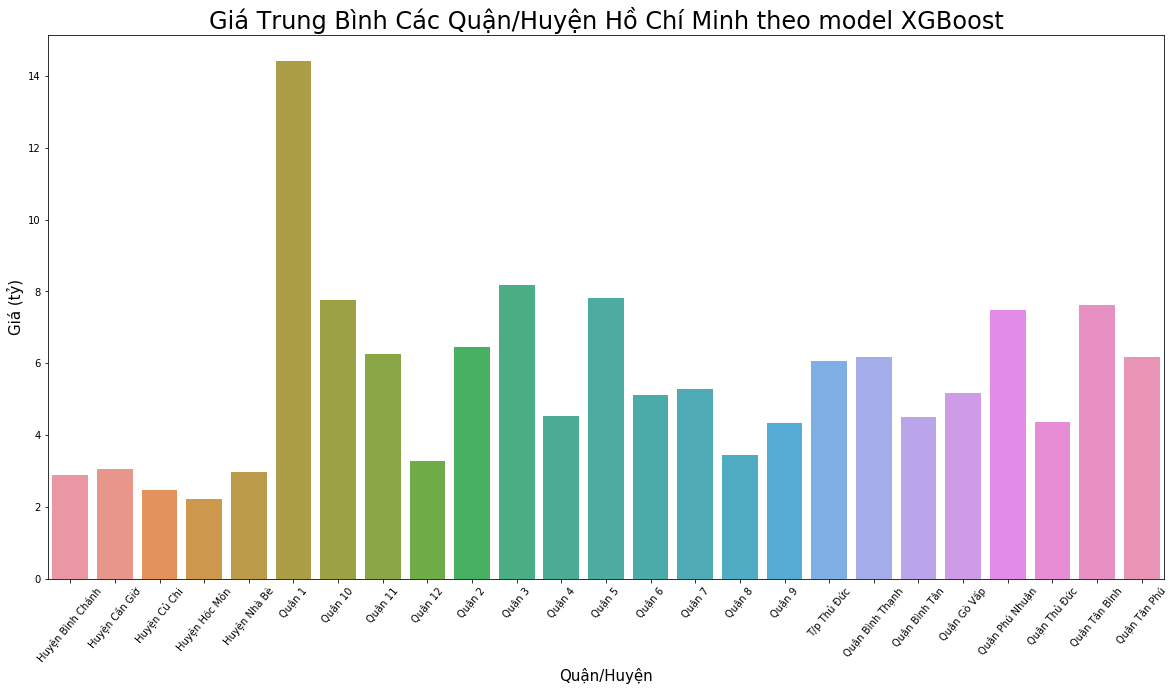

In [42]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))
# Add title
plt.title("Giá Trung Bình Các Quận/Huyện Hồ Chí Minh theo model XGBoost", fontsize=24)

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=a.index, y=a["Gia"])

# Add label for vertical axis
plt.xlabel("Quận/Huyện", fontsize=15)
plt.ylabel("Giá (tỷ)", fontsize=15)

plt.xticks(rotation=50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

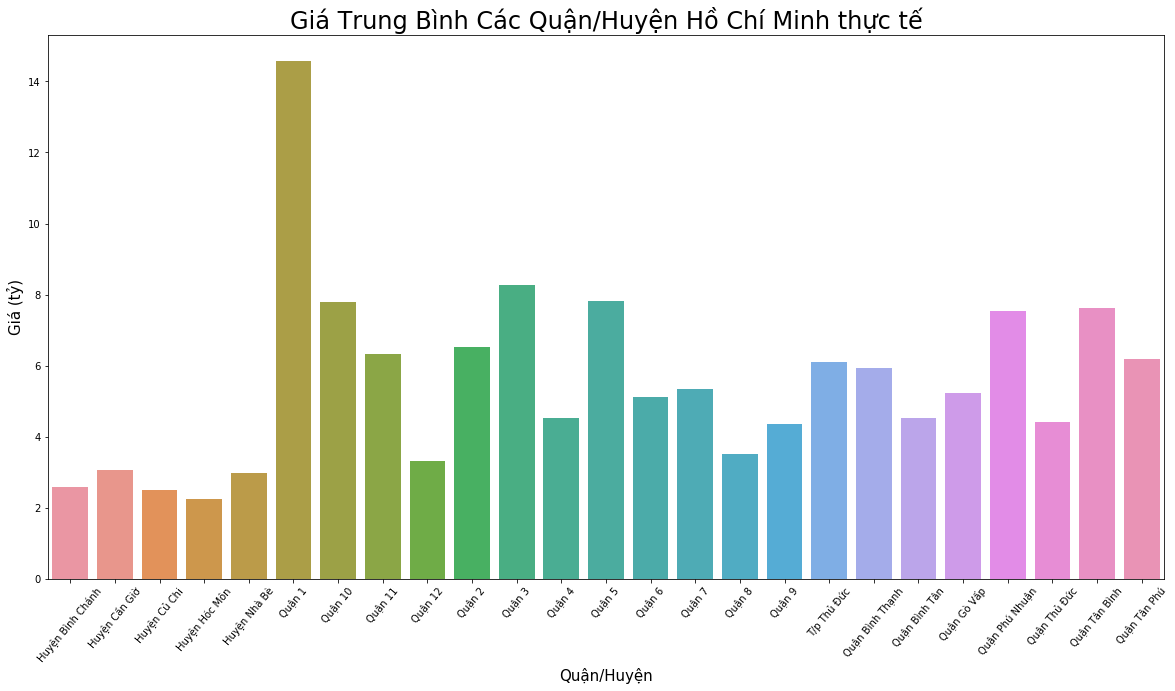

In [43]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))
# Add title
plt.title("Giá Trung Bình Các Quận/Huyện Hồ Chí Minh thực tế", fontsize=24)

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=real.index, y=real["Gia"])

# Add label for vertical axis
plt.xlabel("Quận/Huyện", fontsize=15)
plt.ylabel("Giá (tỷ)", fontsize=15)

plt.xticks(rotation=50)

In [93]:
len(final_predictions_li)

4821

In [94]:
for i, row in HCM_copy.iterrows():
    row["Thang2"] = int(row["Thang"]) + 1
    row["Nam2"] = int(row["Nam"]) + 2019
    HCM_copy.at[i,'Thang2'] = row['Thang2']
    HCM_copy.at[i,'Nam2'] = row['Nam2']
HCM_copy["Ngay2"] = 1

In [95]:
df2 = HCM_copy[["Nam2", "Thang2", "Ngay2"]].copy()
df2.columns = ["year", "month", "day"]
HCM_copy["date"] = pd.to_datetime(df2)

In [96]:
HCM_dat = pd.DataFrame()
HCM_dat["date"] = HCM_copy["date"]
HCM_dat["Actual"] = HCM["Gia"]
HCM_dat["XGB"] = final_predictions_xg
HCM_dat["LGBM"] = final_predictions_lg
HCM_dat["Ensemble"] = ensemble
HCM_dat["Linear"] = final_predictions_li

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
HCM_dat = HCM_dat.set_index('date')
# HCM_dat['date'] = HCM_dat['date'].values.astype(float)
# plt.figure(figsize=(14,7))
# sns.lineplot(data=HCM_dat)

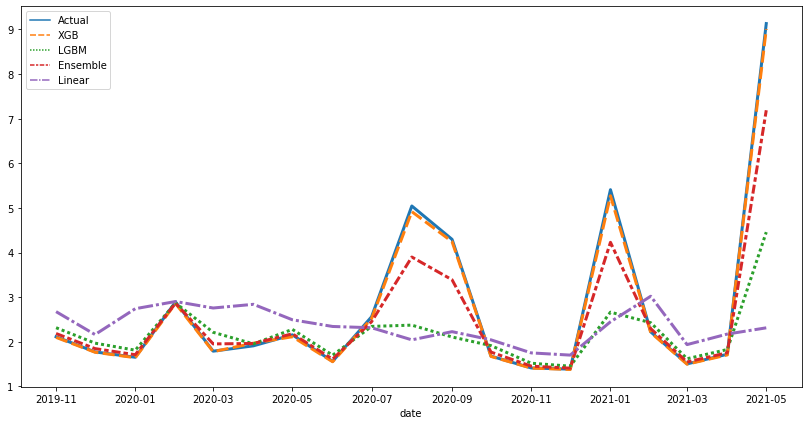

In [98]:
# Group data first by year, then by month
g = HCM_dat.groupby(["date"])

# For each group, calculate the average of only the snow_depth column
monthly_averages = g.aggregate({np.mean})
plt.figure(figsize=(14,7))
sns.lineplot(data=monthly_averages, linewidth = 3, size_order=["Actual", "XGB"])

In [70]:
monthly_averages

,Actual,XGB,LGBM,Ensemble,Linear
,mean,mean,mean,mean,mean
date,,,,,
2019-11-01,2.113653,2.099518,2.316113,2.186156,2.547588
2019-12-01,1.774121,1.766746,1.970275,1.848158,2.111457
2020-01-01,1.654337,1.644554,1.812711,1.711817,2.475018
2020-02-01,2.893533,2.859423,2.869975,2.863644,2.672222
2020-03-01,1.790975,1.780149,2.213452,1.953470,2.596858
2020-04-01,1.910569,1.969512,1.953823,1.963237,2.706105
2020-05-01,2.156677,2.114003,2.278842,2.179938,2.384053
2020-06-01,1.562580,1.554316,1.700485,1.612784,2.270952
